# 6- Rastgele Ağaçlar / Random Forests

## TEORİ

**Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.**

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi 

* Kullanılan Kütüphaneler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

* Verisetinin İncelenmesi

Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/Hitters.csv) indirebilirsiniz.

In [2]:
hit = pd.read_csv("https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/Hitters.csv")
df = hit.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.info() # veriseti hakkında bilgi verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
df.isnull().values.any() # verisetinde bos degerler var mı?

True

In [5]:
df = df.dropna(axis = 0) # verisetindeki bos degerlerin oldugu satırları siler

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [7]:
df.nunique() # sütun bazında eşsiz degerlerin sayısı

AtBat        209
Hits         130
HmRun         35
Runs          92
RBI           94
Walks         87
Years         21
CAtBat       257
CHits        241
CHmRun       129
CRuns        226
CRBI         226
CWalks       207
League         2
Division       2
PutOuts      199
Assists      145
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [8]:
df.describe().T # verisetinin istatistiksel dagılımı

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [9]:
df.corr() # aralarındaki korelasyon degerleri

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931


In [10]:
# verisetindeki kategorik degiskenler sürekli degiskenlere cevrilmeli,
dummy = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dummy.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [11]:
# kategorik degiskenler ana verisetinden silinmeli,
df1 = df.drop(['League', 'Division', 'NewLeague'], axis = 1)
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [12]:
# dummy ve df1 birlestirerek güncel veriseti olusturulur,
df = pd.concat([df1, dummy[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


### Model Kurulumu

In [13]:
X = df.drop(['Salary'], axis =  1) # Salary dısındaki bagımsız degiskenler
y = df['Salary'] # bagımlı degisken

# %80 egitim, %20 test seti,
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)

In [14]:
# modelin olusturulması ve fit edilmesi,
rf_model = RandomForestRegressor(random_state = 42)
rf_mdoel = rf_model.fit(X_train, y_train)
rf_model

RandomForestRegressor(random_state=42)

In [15]:
# modelin parametrelerin incelenmesi,

In [16]:
rf_model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [17]:
rf_model.n_estimators # fit edilen agac sayısı

100

In [18]:
rf_model.max_features # maksimum degisken sayısı

'auto'

In [19]:
rf_model.min_samples_split # nodedaki minimum gözlem sayısı

2

In [20]:
rf_model.min_samples_leaf # leafdeki minimum gözlem sayısı

1

In [21]:
rscore = rf_model.score(X_train, y_train) # model basarı degeri

In [22]:
rscore # [önemli]

0.9469715889958822

### Tahminleme

In [23]:
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # modelin hata degeri

In [24]:
rmse # [önemli]

305.03231392023173

In [25]:
print(f"Modelin hata degeri: {rmse} ve basarı yüzdesi: {rscore * 100}")

Modelin hata degeri: 305.03231392023173 ve basarı yüzdesi: 94.69715889958822


### Model Tuning / Model Doğrulama

In [26]:
# optimum degerlerinin bulunması
rf_params = {'max_depth': list(range(1, 10)),
            'max_features': [3, 5, 10, 15],
            'n_estimators': [100, 200, 500, 1000, 2000]}

In [27]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)
rf_cv_model = rf_cv_model.fit(X_train, y_train)  # uzun sürebilir! (4-5 dk)
rf_cv_model

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [29]:
rf_cv_model.best_params_ # optimum degerler

{'max_depth': 6, 'max_features': 3, 'n_estimators': 500}

In [30]:
# final modelin olusturulması ve hata degerinin bulunması,
rf_tuned = RandomForestRegressor(max_depth = 6,
                                max_features = 3,
                                n_estimators = 500).fit(X_train, y_train)
rf_tuned

RandomForestRegressor(max_depth=6, max_features=3, n_estimators=500)

In [31]:
ypred = rf_tuned.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, ypred))

In [32]:
rmse_tuned # [önemli]

320.40186977494363

In [33]:
print(f"Opimum parametreler ile olusturulan modelin hata degeri: {rmse_tuned}")

Opimum parametreler ile olusturulan modelin hata degeri: 320.40186977494363


#### Degişkenlerin Önem Düzeyi

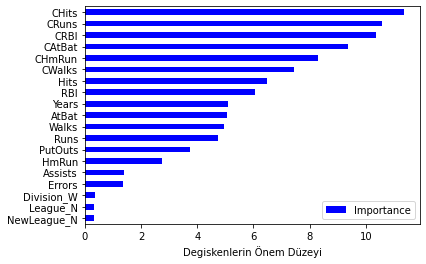

In [34]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_ * 100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = 'barh', color = 'blue')
plt.xlabel('Degiskenlerin Önem Düzeyi')
plt.legend(loc = 4);

## SONUÇ

* Opimum parametreler ile olusturulan modelin hata degeri: **320.40186977494363**